In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
import scipy as sp
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## paired t-test

#### 대응 표본 t-test (paired t-test) : 같은 대상의 전 vs 후 비교

In [34]:
df = pd.read_csv('../../data/paired_ttest.csv')
df

,student,before,after
0,1,63,69
1,2,65,65
2,3,56,62
3,4,100,91
4,5,88,78
5,6,83,87
6,7,77,79
7,8,92,88
8,9,90,85
9,10,84,92


In [5]:
df[['before', 'after']].mean()  # 그룹별 평균

before    78.1250
after     79.4375
dtype: float64

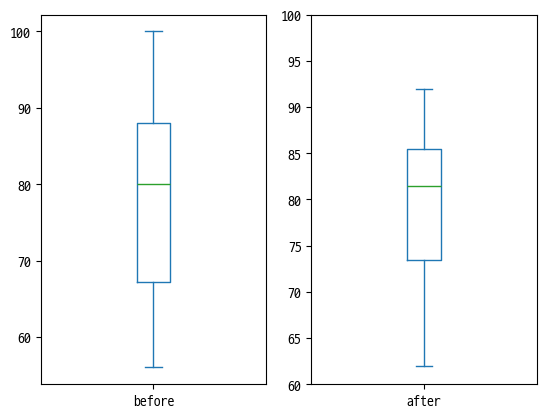

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df['before'].plot.box(grid=False, ax=axes[0])
plt.ylim([60, 100])
df['after'].plot.box(grid=False, ax=axes[1])
plt.show()

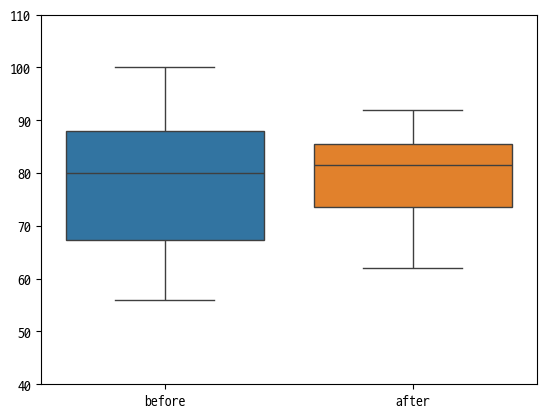

In [13]:
sns.boxplot(data=df[['before', 'after']])
plt.ylim(40, 110)
plt.show()

In [ ]:
# 정규성 검정 (귀무가설 : 정규분포를 이룬다)
sp.stats.shapiro(df['after'])

## 결론 : p-value값 : 0.05보다 크므로, 귀무가설을 채택한다. 즉 after항목의 데이터는 정규분포를 이룬다

ShapiroResult(statistic=np.float64(0.9405552345990447), pvalue=np.float64(0.3558706036513564))

In [9]:
# 정규성 검정 (귀무가설 : 정규분포를 이룬다)
sp.stats.shapiro(df['before'])

## 결론 : p-value값 : 0.05보다 크므로, 귀무가설을 채택한다. 즉 after항목의 데이터는 정규분포를 이룬다

ShapiroResult(statistic=np.float64(0.9583576921082592), pvalue=np.float64(0.6321066219033444))

In [ ]:
## paired t-test (귀무가설 : before와 after의 평균 차이가 없다)

sp.stats.ttest_rel(df['before'], df['after'])   ## rel : related


## 결론 : p-value가 0.05보다 크므로, 귀무가설 채택 ==> before와 after 사이에 유의미한 차이가 없다
## 즉 전/후 변화가 있다고 할 근거가 부족하다

TtestResult(statistic=np.float64(-0.7497768853141169), pvalue=np.float64(0.4649871003972206), df=np.int64(15))

## 맨 휘트니 u-test

In [17]:
df = pd.read_csv('../../data/mann_whitney_test_data.csv')
display(df.head())
display(df.tail())

,score,group
0,64.967142,A
1,58.617357,A
2,66.476885,A
3,75.230299,A
4,57.658466,A


,score,group
55,64.412270,B
56,63.298028,B
57,67.824071,B
58,61.518981,B
59,76.204836,B


In [ ]:
# 그룹별 평균과 중앙값

display(df.groupby('group')['score'].mean())
display(df.groupby('group')['score'].median())

group
A    58.118531
B    69.541134
Name: score, dtype: float64

group
A    57.658548
B    66.318190
Name: score, dtype: float64

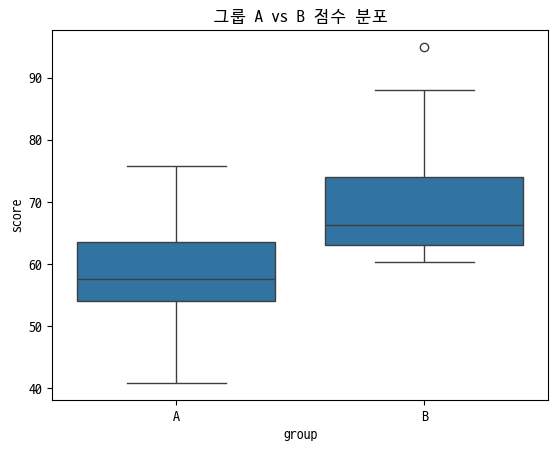

In [21]:
# 박스플롯
sns.boxplot(x='group', y='score', data=df)
plt.title("그룹 A vs B 점수 분포")
plt.show()

In [31]:
group_A = df.loc[df.group == 'A', 'score']
group_A.head(3)

0    64.967142
1    58.617357
2    66.476885
Name: score, dtype: float64

In [32]:
group_B = df.loc[df.group == 'B', 'score']
group_B.head(3)

30    71.527508
31    65.800908
32    61.301522
Name: score, dtype: float64

In [ ]:
print("A 그룹 정규성:", sp.stats.shapiro(group_A))
print("B 그룹 정규성:", sp.stats.shapiro(group_B))

## 결론 : A그룹의 경우, p-value가 0.05보다 크므로, 귀무가설 채택 ("정규분포를 이룬다"는 귀무가설 채택)
## B그룹의 경우, p-value가 0.05보다 작으므로, 귀무가설 기각 ("정규분포를 이루지 않는다"는 대립가설 채택)

A 그룹 정규성: ShapiroResult(statistic=np.float64(0.9751383104692292), pvalue=np.float64(0.686805494291708))
B 그룹 정규성: ShapiroResult(statistic=np.float64(0.8442531294099146), pvalue=np.float64(0.00047109903748606666))


In [ ]:
## 귀무가설 : 두 집단의 분포가 같다

sp.stats.mannwhitneyu(group_A, group_B)

## 결론 : p-value값이 0.05보다 작으므로, 두 집단의 분포는 서로 다르다

MannwhitneyuResult(statistic=np.float64(159.0), pvalue=np.float64(1.7479133317173934e-05))